In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ruptures as rpt
import pandas as pd
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.log.importer.xes import importer as xes_importer
from datetime import date
from pm4py.objects.petri_net.importer import importer as pnml_importer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
import seaborn as sns
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import pm4py
import os
import datetime
log = pm4py.read_xes("../../data/syntheticlog15batches.xes")
from pm4py.algo.discovery.batches import algorithm
batches = algorithm.apply(log)
batchespm4py = set()
for act_res in batches:
    if act_res[0][0]=='b':
        print("activity: "+act_res[0][0]+" resource: "+str(act_res[0][1]))
        print("number of distinct batches: "+str(act_res[1]))
        for batch_type in act_res[2]:
            print(batch_type, len(act_res[2][batch_type]))
            for batch_info in act_res[2][batch_type]:
                print(datetime.datetime.fromtimestamp(batch_info[0]),'to ', datetime.datetime.fromtimestamp(batch_info[1]))
                batchespm4py.add(datetime.datetime.fromtimestamp(batch_info[1]))

parsing log, completed traces ::   0%|          | 0/2000 [00:00<?, ?it/s]

activity: b resource: 7
number of distinct batches: 44
Simultaneous 44
2020-01-24 21:30:00 to  2020-01-24 21:30:00
2020-01-25 20:30:00 to  2020-01-25 20:30:00
2020-01-27 19:30:00 to  2020-01-27 19:30:00
2020-01-28 21:30:00 to  2020-01-28 21:30:00
2020-01-30 02:30:00 to  2020-01-30 02:30:00
2020-01-30 18:30:00 to  2020-01-30 18:30:00
2020-01-30 22:30:00 to  2020-01-30 22:30:00
2020-01-30 23:30:00 to  2020-01-30 23:30:00
2020-01-31 00:30:00 to  2020-01-31 00:30:00
2020-01-31 02:30:00 to  2020-01-31 02:30:00
2020-01-31 22:30:00 to  2020-01-31 22:30:00
2020-01-31 23:30:00 to  2020-01-31 23:30:00
2020-02-01 02:30:00 to  2020-02-01 02:30:00
2020-02-02 19:30:00 to  2020-02-02 19:30:00
2020-02-02 23:30:00 to  2020-02-02 23:30:00
2020-02-03 19:30:00 to  2020-02-03 19:30:00
2020-02-04 01:30:00 to  2020-02-04 01:30:00
2020-02-04 19:30:00 to  2020-02-04 19:30:00
2020-02-05 00:30:00 to  2020-02-05 00:30:00
2020-02-05 02:30:00 to  2020-02-05 02:30:00
2020-02-06 18:30:00 to  2020-02-06 18:30:00
2020-

2020-02-10 18:30:00 to  2020-02-10 18:30:00
2020-02-10 19:30:00 to  2020-02-10 19:30:00
2020-02-13 01:30:00 to  2020-02-13 01:30:00
2020-02-14 18:30:00 to  2020-02-14 18:30:00
2020-02-16 18:30:00 to  2020-02-16 18:30:00
2020-02-18 00:30:00 to  2020-02-18 00:30:00
2020-02-19 16:30:00 to  2020-02-19 16:30:00
2020-02-27 16:30:00 to  2020-02-27 16:30:00
2020-03-02 16:30:00 to  2020-03-02 16:30:00
2020-03-06 16:30:00 to  2020-03-06 16:30:00
2020-03-10 16:30:00 to  2020-03-10 16:30:00
2020-03-18 16:30:00 to  2020-03-18 16:30:00
2020-03-22 16:30:00 to  2020-03-22 16:30:00
2020-03-26 16:30:00 to  2020-03-26 16:30:00
2020-03-30 16:30:00 to  2020-03-30 16:30:00
2020-04-03 16:30:00 to  2020-04-03 16:30:00
2020-04-07 16:30:00 to  2020-04-07 16:30:00
2020-04-11 16:30:00 to  2020-04-11 16:30:00
2020-04-15 16:30:00 to  2020-04-15 16:30:00
activity: b resource: 9
number of distinct batches: 33
Simultaneous 33
2020-01-26 02:30:00 to  2020-01-26 02:30:00
2020-01-27 20:30:00 to  2020-01-27 20:30:00
2020-

In [3]:
targetdatedataframe = pd.read_csv(r'C:\Users\bittu\RWTH\Thesis\syntheticlog15batchestarget.csv')
targetdatedataframe['date']=pd.to_datetime(targetdatedataframe['date']).dt.date
targetdatedataframe['WaitingTime']=pd.to_timedelta(targetdatedataframe['WaitingTime'])

In [4]:
targetdatedataframe


,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList
0,2020-01-22,43,4,39,5 days 12:30:00,43,"['823', '801', '395', '262']"
1,2020-01-23,114,7,146,76 days 02:00:00,153,"['1875', '1205', '423', '363', '118', '85', '22']"
2,2020-01-24,133,19,260,268 days 11:00:00,279,"['1743', '1631', '1582', '1522', '1474', '1417..."
3,2020-01-25,142,34,368,564 days 02:00:00,402,"['1901', '1895', '1725', '1682', '1656', '1613..."
4,2020-01-26,85,45,408,920 days 07:00:00,453,"['2000', '1996', '1964', '1882', '1863', '1787..."
...,...,...,...,...,...,...,...
80,2020-04-11,0,21,26,3291 days 18:00:00,47,"['1686', '1520', '1409', '1404', '1330', '1196..."
81,2020-04-12,0,0,26,1796 days 02:00:00,26,[]
82,2020-04-13,0,0,26,1822 days 02:00:00,26,[]
83,2020-04-14,0,0,26,1848 days 02:00:00,26,[]


[5, 10, 15, 20, 25, 30, 35, 45, 85]


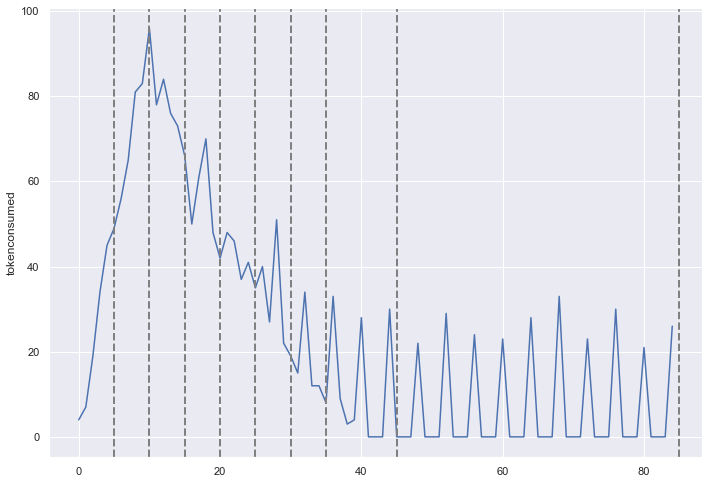

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
algo_python = rpt.Pelt(model="l2").fit(
    targetdatedataframe[['tokenconsumed']]
)  # written in pure python

result = algo_python.predict(1)
print(result)
sns.lineplot(data=targetdatedataframe,x=targetdatedataframe.index, y="tokenconsumed")
for cp in result:
    plt.axvline(cp, c='gray', ls='--', lw=2)

#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")
sns.set(rc={'figure.figsize':(11.7,8.27)})
targetdatedataframe['chunkmean'] = 0
targetdatedataframe['chunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['chunkmean'].iloc[start:index]=targetdatedataframe[ ['tokenconsumed'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['chunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='chunkmean')
sns.lineplot(data=targetdatedataframe, x='date', y='tokenconsumed')


C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='date', ylabel='chunkmean'>

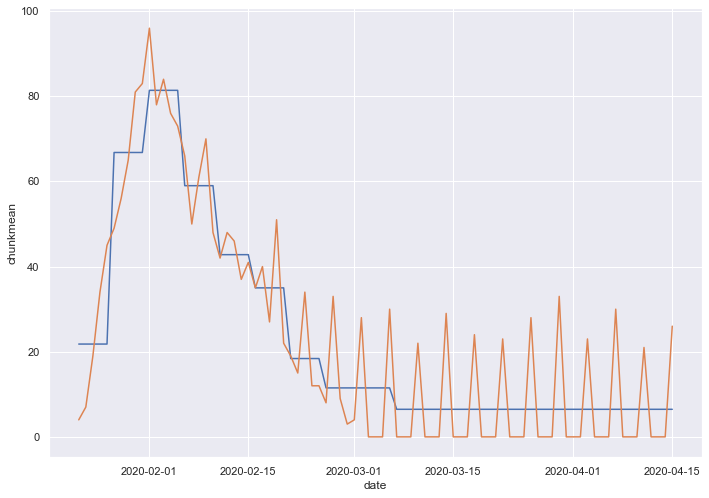

In [6]:
#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")
targetdatedataframe['chunkmean'] = 0
targetdatedataframe['chunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['chunkmean'].iloc[start:index]=targetdatedataframe[ ['tokenconsumed'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['chunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='chunkmean')
sns.lineplot(data=targetdatedataframe, x='date', y='tokenconsumed')


In [7]:
sensitivity=1.5

def categorise(row):   
    if row['chunkmean']*sensitivity < row['tokenconsumed'] and row['tokenconsumed']>1 :
        return 1
    return 0

targetdatedataframe['chunkbatched'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)
print(len(targetdatedataframe[targetdatedataframe['chunkbatched']>0]))
batcheddf=targetdatedataframe[targetdatedataframe['chunkbatched']>0].sort_values(by='date')
batcheddf

16


,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList,chunkmean,chunkindex,chunkbatched
3,2020-01-25,142,34,368,564 days 02:00:00,402,"['1901', '1895', '1725', '1682', '1656', '1613...",21.800,1,1
4,2020-01-26,85,45,408,920 days 07:00:00,453,"['2000', '1996', '1964', '1882', '1863', '1787...",21.800,1,1
32,2020-02-23,0,34,398,8312 days 16:00:00,432,"['1995', '1950', '1888', '1869', '1796', '1744...",18.400,7,1
36,2020-02-27,0,33,333,9071 days 20:30:00,366,"['1951', '1885', '1856', '1730', '1679', '1618...",11.500,8,1
40,2020-03-02,0,28,289,9552 days 09:30:00,317,"['1954', '1854', '1778', '1750', '1740', '1720...",11.500,8,1
44,2020-03-06,0,30,259,9849 days 23:30:00,289,"['1992', '1991', '1915', '1774', '1650', '1647...",11.500,8,1
48,2020-03-10,0,22,237,9864 days 12:30:00,259,"['1960', '1842', '1804', '1690', '1502', '1362...",6.475,9,1
52,2020-03-14,0,29,208,9907 days 08:00:00,237,"['1937', '1873', '1734', '1714', '1674', '1534...",6.475,9,1
56,2020-03-18,0,24,184,9535 days 17:00:00,208,"['1952', '1907', '1837', '1702', '1688', '1499...",6.475,9,1
60,2020-03-22,0,23,161,9113 days 14:30:00,184,"['1979', '1958', '1956', '1938', '1550', '1447...",6.475,9,1


[5, 10, 20, 30, 85]


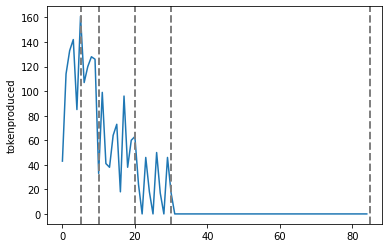

In [6]:
algo_python = rpt.Pelt(model="l2").fit(
    targetdatedataframe[['tokenproduced']]
)  # written in pure python

result = algo_python.predict(1)
print(result)
sns.lineplot(data=targetdatedataframe,x=targetdatedataframe.index, y="tokenproduced")
for cp in result:
    plt.axvline(cp, c='gray', ls='--', lw=2)

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='date', ylabel='pchunkmean'>

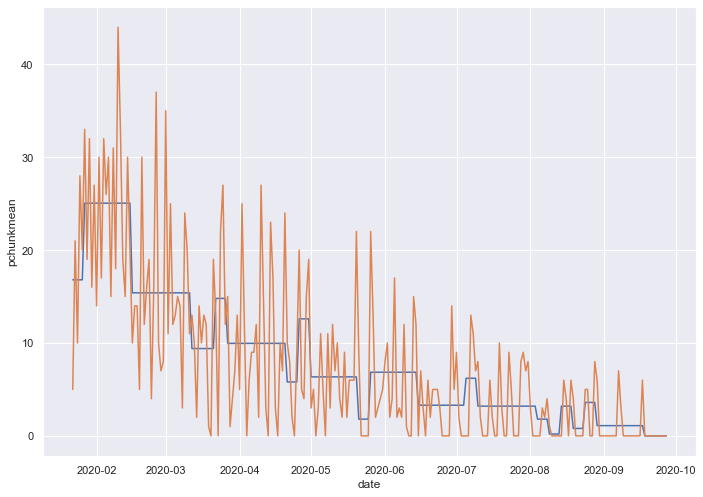

In [14]:
#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")
targetdatedataframe['pchunkmean'] = 0
targetdatedataframe['pchunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['pchunkmean'].iloc[start:index]=targetdatedataframe[ ['tokenproduced'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['pchunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='pchunkmean')
sns.lineplot(data=targetdatedataframe, x='date', y='tokenproduced')


In [15]:
def categorise(row):   
    if row['pchunkmean'] < row['tokenproduced'] and row['tokenproduced']>1 :
        return 1
    return 0

targetdatedataframe['pchunkbatched'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)
print(len(targetdatedataframe[targetdatedataframe['pchunkbatched']>0]))
batcheddf=targetdatedataframe[targetdatedataframe['pchunkbatched']>0].sort_values(by='date')
batcheddf

99


,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList,chunkmean,chunkindex,chunkbatched,pchunkmean,pchunkindex,pchunkbatched
1,2020-01-23,21,0,26,10 days 06:00:00,26,[],1.80,1,0,16.80,1,1
3,2020-01-25,28,2,58,80 days 00:00:00,60,"['1059', '859']",1.80,1,1,16.80,1,1
4,2020-01-26,20,3,75,140 days 23:30:00,78,"['653', '163', '108']",1.80,1,1,16.80,1,1
5,2020-01-27,33,10,98,216 days 23:00:00,108,"['1848', '1708', '1675', '1411', '898', '616',...",11.30,2,0,25.05,2,1
7,2020-01-29,32,14,127,405 days 07:30:00,141,"['1935', '1819', '1572', '1554', '1462', '1147...",11.30,2,1,25.05,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2020-08-28,8,2,11,27 days 13:30:00,13,"['1601', '791']",3.60,19,0,3.60,19,1
220,2020-08-29,6,1,16,29 days 09:00:00,17,['203'],1.35,20,0,1.10,20,1
229,2020-09-07,7,3,5,10 days 21:30:00,8,"['1604', '223', '79']",1.35,20,1,1.10,20,1
230,2020-09-08,3,2,6,7 days 12:00:00,8,"['1422', '305']",1.35,20,1,1.10,20,1


In [11]:
print(len(batchespm4py))
df = pd.DataFrame(batchespm4py, columns = ['batchingdate'])
pd.set_option('display.max_rows',310)
df['date']=df['batchingdate'].dt.date
df.sort_values(by='batchingdate')
df['date'].nunique()



191


47

In [17]:
pd.set_option('display.max_rows',310)
merged=pd.merge(df,batcheddf,on='date',how='inner')
merged.sort_values(by=['date'])

,batchingdate,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList,chunkmean,chunkindex,chunkbatched
0,2020-01-25 18:30:00,2020-01-25,142,34,368,564 days 02:00:00,402,"['1901', '1895', '1725', '1682', '1656', '1613...",21.800,1,1
1,2020-01-25 20:30:00,2020-01-25,142,34,368,564 days 02:00:00,402,"['1901', '1895', '1725', '1682', '1656', '1613...",21.800,1,1
2,2020-01-25 01:30:00,2020-01-25,142,34,368,564 days 02:00:00,402,"['1901', '1895', '1725', '1682', '1656', '1613...",21.800,1,1
3,2020-01-26 17:30:00,2020-01-26,85,45,408,920 days 07:00:00,453,"['2000', '1996', '1964', '1882', '1863', '1787...",21.800,1,1
4,2020-01-26 19:30:00,2020-01-26,85,45,408,920 days 07:00:00,453,"['2000', '1996', '1964', '1882', '1863', '1787...",21.800,1,1
5,2020-01-26 21:30:00,2020-01-26,85,45,408,920 days 07:00:00,453,"['2000', '1996', '1964', '1882', '1863', '1787...",21.800,1,1
6,2020-01-26 01:30:00,2020-01-26,85,45,408,920 days 07:00:00,453,"['2000', '1996', '1964', '1882', '1863', '1787...",21.800,1,1
7,2020-01-26 02:30:00,2020-01-26,85,45,408,920 days 07:00:00,453,"['2000', '1996', '1964', '1882', '1863', '1787...",21.800,1,1
8,2020-01-26 20:30:00,2020-01-26,85,45,408,920 days 07:00:00,453,"['2000', '1996', '1964', '1882', '1863', '1787...",21.800,1,1
9,2020-01-26 23:30:00,2020-01-26,85,45,408,920 days 07:00:00,453,"['2000', '1996', '1964', '1882', '1863', '1787...",21.800,1,1


In [18]:
merged.nunique()

batchingdate          24
date                  16
tokenproduced          3
tokenconsumed         11
tokenleft             16
WaitingTime           16
Count                 16
consumedByUserList    16
chunkmean              4
chunkindex             4
chunkbatched           1
dtype: int64

In [ ]:
Shared - 19
Pm4py- 40
Statistical- 32
Original- 10


In [21]:
targetdatedataframe['date']=pd.to_datetime(targetdatedataframe['date']).dt.date